# Load Tabular Dataset

In [ ]:
import pandas as pd
Data = pd.read_csv('/content/Acceptance rate Data.csv')
Data.head(20)

,Image No.,Color,Pattern,Total Acc
0,1,75,85,80
1,2,70,85,78
2,3,90,85,88
3,4,85,80,83
4,5,80,70,75
5,6,65,70,68
6,7,60,50,55
7,8,90,75,83
8,9,70,75,73
9,10,80,75,78


In [ ]:
Data.shape

(2102, 4)

In [ ]:
print(Data.columns)

Index(['Image No.', 'Color ', 'Pattern ', 'Total Acc'], dtype='object')


In [ ]:
print(Data.dtypes)

Image No.    int64
Color        int64
Pattern      int64
Total Acc    int64
dtype: object


# Load Image Dataset

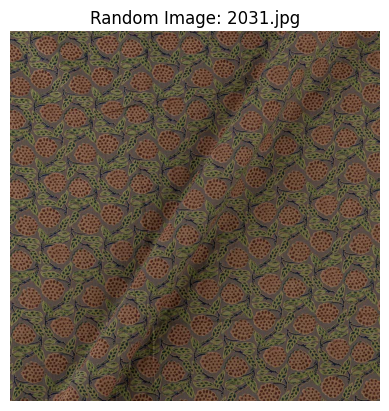

In [ ]:
Data = '/content/drive/MyDrive/2100 images'

import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir):
    # Get a list of all files in the target directory
    all_files = [f for f in os.listdir(target_dir) if os.path.isfile(os.path.join(target_dir, f))]
    # Select a random file from the list
    random_image_path = os.path.join(target_dir, random.choice(all_files))
    # Load and display the image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(f"Random Image: {os.path.basename(random_image_path)}")
    plt.axis("off")
    plt.show()
    print(f"Image shape: {img.shape}")

# Call the function to view a random image
view_random_image(target_dir=Data)


In [ ]:
import pandas as pd

# Load tabular dataset
tabular_data = pd.read_csv('/content/Acceptance rate Data.csv')

# Print the column names of the tabular dataset
# print("Column Names in Tabular Dataset:", tabular_data.columns)
tabular_data.shape


Image shape: (1000, 1000, 3)


(2102, 4)

# Tabular Data Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load tabular dataset
tabular_data = pd.read_csv('/content/Acceptance rate Data.csv')

# Define columns to scale (ensure correct column names without trailing spaces)
columns_to_scale = ['Color ', 'Pattern ', 'Total Acc']

# Feature scaling for tabular dataset columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tabular_data[columns_to_scale])

# Convert scaled features back to DataFrame with column names
scaled_tabular_data = pd.DataFrame(scaled_features, columns=columns_to_scale)

# Concatenate the 'Image No.' column with scaled_tabular_data
scaled_tabular_data['Image No.'] = tabular_data['Image No.']

# Print the first few rows of the scaled_tabular_data DataFrame
print(scaled_tabular_data.head())

     Color   Pattern   Total Acc  Image No.
0  0.975328  1.613231   1.498441          1
1  0.411111  1.613231   1.305703          2
2  2.667981  1.613231   2.269393          3
3  2.103763  1.262159   1.787548          4
4  1.539546  0.560013   1.016596          5


In [ ]:
# Reorder columns to place 'Image No.' column at the beginning
column_order = ['Image No.', 'Color ', 'Pattern ', 'Total Acc']
scaled_tabular_data = scaled_tabular_data[column_order]

# Print the first few rows of the scaled_tabular_data DataFrame with the 'Image No.' column at the beginning
print(scaled_tabular_data.head())

   Image No.    Color   Pattern   Total Acc
0          1  0.975328  1.613231   1.498441
1          2  0.411111  1.613231   1.305703
2          3  2.667981  1.613231   2.269393
3          4  2.103763  1.262159   1.787548
4          5  1.539546  0.560013   1.016596


# Image Preprocessing

In [ ]:
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to preprocess image
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    img = cv2.imread(image_path)
    # Resize the image
    img = cv2.resize(img, target_size)
    # Normalize pixel values
    img = img / 255.0
    return img

In [ ]:
import os

# Define the directory containing the images
image_directory = '/content/drive/MyDrive/2100 images'
# List all image files in the directory
image_files = os.listdir(image_directory)

# List to store preprocessed images
processed_images = []

# Preprocess each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_directory, image_file)
    # Preprocess the image and append it to the list
    processed_image = preprocess_image(image_path)
    processed_images.append(processed_image)

# Convert the list of processed images to a NumPy array
processed_images = np.array(processed_images)

# Print the shape of the processed images array
print("Processed images shape:", processed_images.shape)


Processed images shape: (1917, 224, 224, 3)


# step 1  
Split Dataset

In [ ]:
# Ensure that the number of samples matches
n_samples = min(len(processed_images), len(scaled_tabular_data), len(tabular_data))

# Use the same number of samples for all datasets
processed_images = processed_images[:n_samples]
scaled_tabular_data = scaled_tabular_data[:n_samples]
tabular_data = tabular_data[:n_samples]

# Now, you can proceed with splitting the data
from sklearn.model_selection import train_test_split

# Split the data
X_train_img, X_test_img, X_train_tab, X_test_tab, y_train, y_test = train_test_split(processed_images, scaled_tabular_data, tabular_data['Total Acc'], test_size=0.2, random_state=42)
print(X_train_img.shape)
print(X_test_img.shape)
print(X_train_tab.shape)
print(X_test_tab.shape)
print(y_train, y_test.shape)

(1533, 224, 224, 3)
(384, 224, 224, 3)
(1533, 4)
(384, 4)
425     68
141     75
1774    68
917     68
1791    60
        ..
1130    73
1294    63
860     58
1459    75
1126    50
Name: Total Acc, Length: 1533, dtype: int64 (384,)


# Mode Buiding

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model


# Define image input
image_input = Input(shape=(224, 224, 3))

# Image processing layers
conv1 = Conv2D(32, (3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten1 = Flatten()(pool2)

# Define tabular input
tabular_input = Input(shape=(4,))


# Concatenate image and tabular inputs
concat = Concatenate()([flatten1, tabular_input])

# Dropout layer
dropout_rate = 0.5
dropout_layer = Dropout(dropout_rate)(concat)

# Dense layers for combined inputs
dense1 = Dense(64, activation='relu')(dropout_layer)
output = Dense(1)(dense1)

# Define the model
model = Model(inputs=[image_input, tabular_input], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 109, 109, 64)         18496     ['max_pooling2d[0][0]']   

In [ ]:
# # Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train the model
# history = model.fit([X_train_img, X_train_tab], y_train, epochs=20, batch_size=32, validation_split=0.2)


from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    [X_train_img, X_train_tab], y_train,
    epochs=20,  # You can set a higher number if needed
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/20
39/39 [==============================] - 11s 91ms/step - loss: 634.6772 - mae: 19.3206 - val_loss: 293.4157 - val_mae: 13.7000
Epoch 2/20
39/39 [==============================] - 2s 51ms/step - loss: 226.3896 - mae: 11.9718 - val_loss: 160.7171 - val_mae: 10.3714
Epoch 3/20
39/39 [==============================] - 2s 47ms/step - loss: 120.0277 - mae: 8.7640 - val_loss: 117.9973 - val_mae: 8.7776
Epoch 4/20
39/39 [==============================] - 2s 48ms/step - loss: 91.5357 - mae: 7.6944 - val_loss: 126.4140 - val_mae: 8.7044
Epoch 5/20
39/39 [==============================] - 2s 53ms/step - loss: 85.2941 - mae: 7.3455 - val_loss: 85.8988 - val_mae: 7.6098
Epoch 6/20
39/39 [==============================] - 2s 54ms/step - loss: 66.1974 - mae: 6.4512 - val_loss: 80.7728 - val_mae: 7.0764
Epoch 7/20
39/39 [==============================] - 2s 52ms/step - loss: 58.4997 - mae: 5.9736 - val_loss: 73.6222 - val_mae: 7.1031
Epoch 8/20
39/39 [==============================] - 2s 47

In [ ]:
# Evaluate the model
loss = model.evaluate([X_test_img, X_test_tab], y_test)
print("Test Loss:", loss)

12/12 [==============================] - 0s 23ms/step - loss: 31.4608 - mae: 4.4680
Test Loss: [31.46080207824707, 4.467996597290039]


In [ ]:
model.save("acceptance_prediction_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


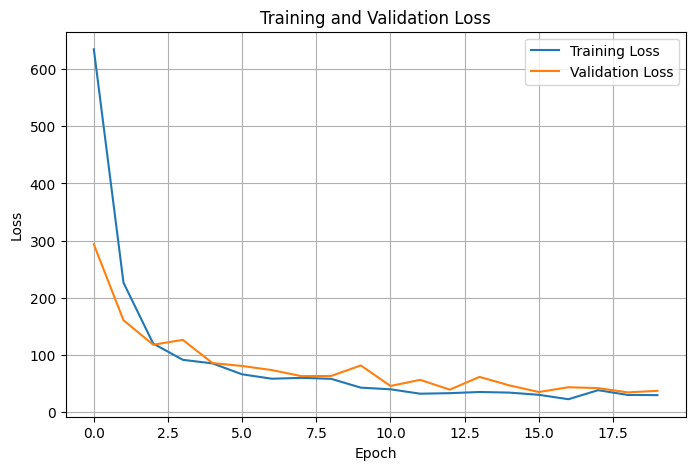

In [ ]:
# Example of plotting training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Prediction

In [ ]:
from tensorflow.keras.models import load_model

1/1 [==============================] - 0s 193ms/step


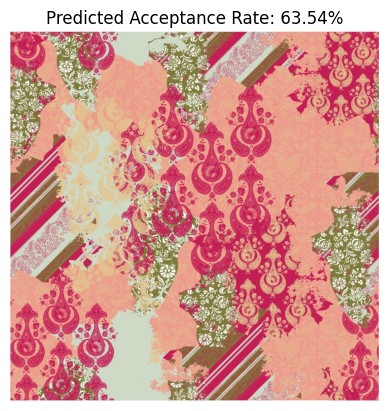

Predicted Acceptance Rate: 63.54%


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def predict_acceptance_rate(image_path, model_path="/content/acceptance_prediction_model.h5", target_size=(224, 224)):
    # Load the pre-trained model
    model = load_model(model_path)

    # Preprocess the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, target_size)
    img_resized = img_resized / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)  # Add a batch dimension

    # Assuming your tabular data has 4 features, create a dummy array filled with zeros
    dummy_tabular_data = np.zeros((1, 4))  # Adjust the shape based on your actual number of features

    # Predict the acceptance rate
    predicted_acceptance_rate = model.predict([img_resized, dummy_tabular_data])[0][0]

    # If the model was trained to predict values between 0 and 1, convert to percentage
    if predicted_acceptance_rate < 1.0:
        predicted_acceptance_rate *= 100

    # Display the image with the predicted acceptance rate
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Acceptance Rate: {predicted_acceptance_rate:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_acceptance_rate

# Example usage
image_path = "/content/drive/MyDrive/2100 images/1070.jpeg"
predicted_rate = predict_acceptance_rate(image_path)
print(f"Predicted Acceptance Rate: {predicted_rate:.2f}%")

# Extra

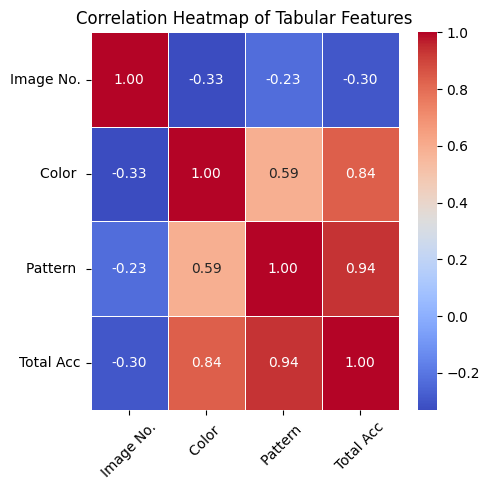

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of visualizing correlation between tabular features and acceptance rates
plt.figure(figsize=(5, 5))
sns.heatmap(scaled_tabular_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Tabular Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

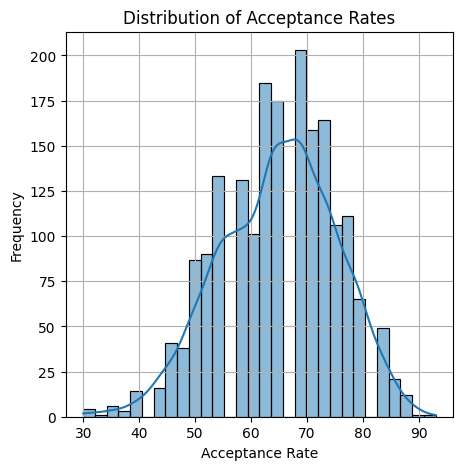

In [ ]:
# Distribution of Acceptance Rates
plt.figure(figsize=(5, 5))
sns.histplot(tabular_data['Total Acc'], kde=True, bins=30)
plt.title('Distribution of Acceptance Rates')
plt.xlabel('Acceptance Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

12/12 [==============================] - 0s 19ms/step


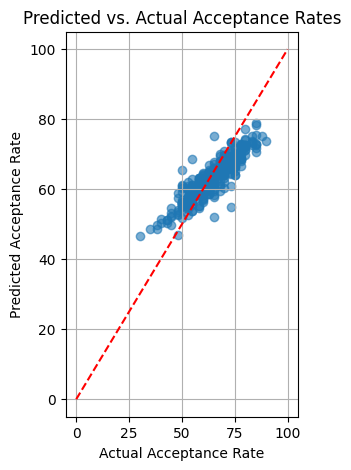

In [ ]:
# Predicted vs. Actual Acceptance Rates
predicted_rates = model.predict([X_test_img, X_test_tab])
plt.figure(figsize=(3, 5))
plt.scatter(y_test, predicted_rates, alpha=0.6)
plt.plot([0, 100], [0, 100], '--', color='red')
plt.title('Predicted vs. Actual Acceptance Rates')
plt.xlabel('Actual Acceptance Rate')
plt.ylabel('Predicted Acceptance Rate')
plt.grid(True)
plt.show()